In [1]:
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import skew, gaussian_kde, kurtosis
from scipy import stats
from sklearn.neighbors import KernelDensity

# Задание 1

In [2]:
"""Вычисление эмпирической фунцкии распределения в точке"""
def ecdf(value, array):
    return sum(array < value)/len(array)

In [3]:
normal = {}
normal['distribution'] = stats.norm
normal['params'] = {"loc": 3, "scale": 5}
normal['array'] = normal['distribution'].rvs(size=1000, **normal['params'])

exponential = {}
exponential['distribution'] = stats.expon
exponential['params'] = {"loc": 3, "scale": 5}
exponential['array'] = exponential['distribution'].rvs(size=1000,**exponential['params'])

uniform = {}
uniform['distribution'] = stats.uniform
uniform['params'] = {"loc": 3, "scale": 5}
uniform['array'] = uniform['distribution'].rvs(size=1000,**uniform['params'])

cauchy = {}
cauchy['distribution'] = stats.cauchy
cauchy['params'] = {"loc": 3, "scale": 5}
cauchy['array'] = cauchy['distribution'].rvs(size=1000,**cauchy['params'])
distributions = {"Нормальное распределение": normal, "Экспоненциальное распределение": 
                 exponential, 
                 "Равномерное распределение": uniform, "Распределение Коши": cauchy}



In [4]:
for key, value in distributions.items():
    print(f"{key}:")
    print(f"Минимальное значение - {min(value['array'])}")
    print(f"Максимальное значение - {max(value['array'])}")
    print(f"Размах - {max(value['array']) - min(value['array'])}")
    print(f"Мат.ожидание- {value['array'].mean()}")
    print(f"Дисперсия - {value['array'].var()}")
    print(f"Стандартное отклонение - {value['array'].std()}")
    
    #print(f"Максимальное значение - {np.max(value)}")
    print(f"0.25 квантиль - {stats.mstats.mquantiles(value['array'], prob=0.25)[0]}")
    print(f"Медиана - {stats.mstats.mquantiles(value['array'], prob=0.5)[0]}")
    print(f"0.75 квантиль - {stats.mstats.mquantiles(value['array'], prob=0.75)[0]}")
    print(f"Коэффициент ассиметрии - {skew(value['array'])}")
    print(f"Эксцесс - {kurtosis(value['array'])}")
    #print(f"Коэффициент ассиметрии - {skew(value)}")
    print("\n_______\n")

Нормальное распределение:
Минимальное значение - -10.573625987088034
Максимальное значение - 22.141920829400693
Размах - 32.715546816488725
Мат.ожидание- 3.247314011304481
Дисперсия - 23.509286763903845
Стандартное отклонение - 4.8486376193631795
0.25 квантиль - -0.11040482741242025
Медиана - 3.263041011271832
0.75 квантиль - 6.532475685535379
Коэффициент ассиметрии - 0.04047011819221441
Эксцесс - 0.10158189308503474

_______

Экспоненциальное распределение:
Минимальное значение - 3.00175136581446
Максимальное значение - 36.40220410267787
Размах - 33.400452736863414
Мат.ожидание- 8.13963722474999
Дисперсия - 24.588174036169484
Стандартное отклонение - 4.958646391523546
0.25 квантиль - 4.622080977630481
Медиана - 6.663106508426267
0.75 квантиль - 10.06133296223626
Коэффициент ассиметрии - 1.7884313098509714
Эксцесс - 4.0986785367485465

_______

Равномерное распределение:
Минимальное значение - 3.0133777135948447
Максимальное значение - 7.9950509118655
Размах - 4.981673198270656
Мат.ожи

# Гистограмма

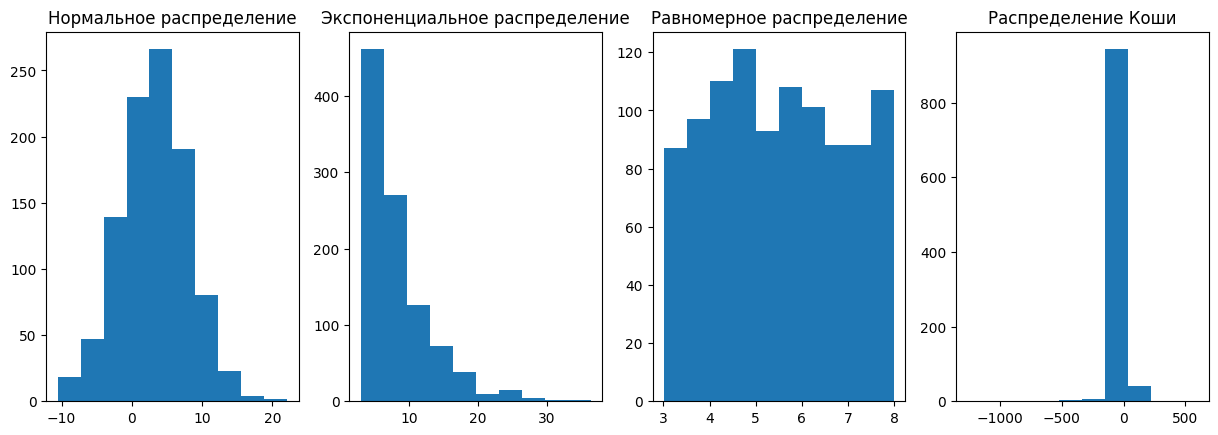

In [5]:
fig, ax = plt.subplots(1, len(distributions))
fig.set_figwidth(15)
for index, value in enumerate(distributions.items()):
    ax[index].hist(value[1]['array'])
    ax[index].set_title(value[0])
plt.show()

# Гистограмма "Ящик с усами"

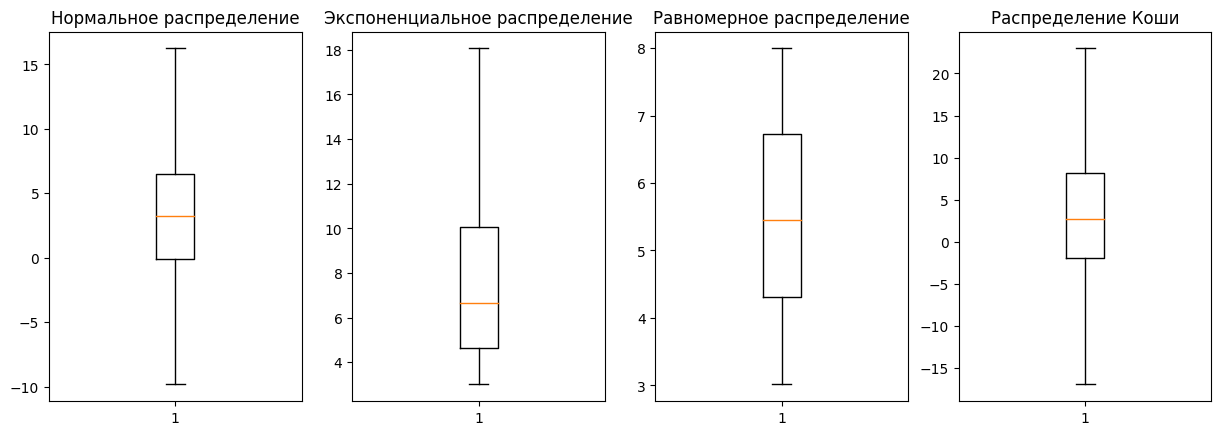

In [6]:
fig, ax = plt.subplots(1, len(distributions))
fig.set_figwidth(15)
for index, value in enumerate(distributions.items()):
    ax[index].boxplot(value[1]['array'], sym='')
    ax[index].set_title(value[0])
plt.show()

# Эмпирическая функция распределения

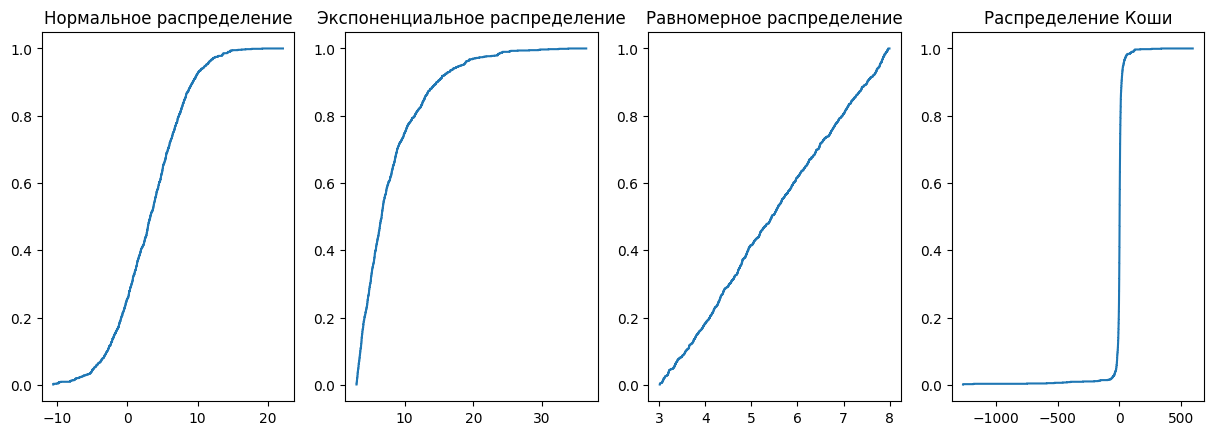

In [7]:
fig, ax = plt.subplots(1, len(distributions))
fig.set_figwidth(15)
for index, value in enumerate(distributions.items()):
    ecdf = ECDF(value[1]['array'])
    ax[index].step(ecdf.x, ecdf.y)
    ax[index].set_title(value[0])
plt.show()


# Плотность распределения

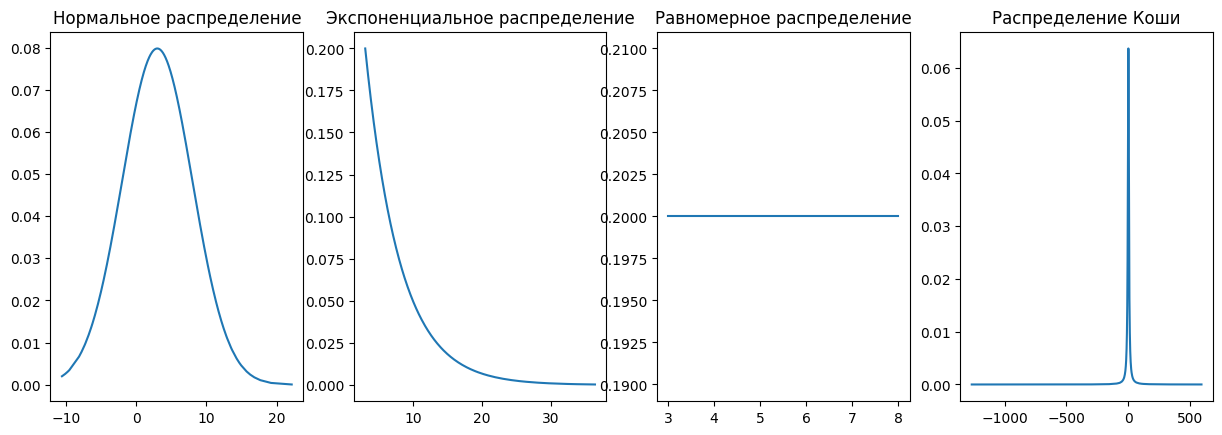

In [8]:
fig, ax = plt.subplots(1, len(distributions))
fig.set_figwidth(15)
for index, value in enumerate(distributions.items()):
    density = value[1]['distribution'].pdf(value[1]['array'], **value[1]['params'])
    # Очень неудобно устанавливаю соответствие между элементами выборки и плотностью
    ax[index].plot(*list(zip(*sorted(list(zip(value[1]['array'], density)), key=lambda x: x[0]))))
    ax[index].set_title(value[0])
plt.show()

# Задание 2

In [9]:
mean = 5
std = 3
sizes = [10, 50, 100, 1000]
means = []

In [10]:
# Нахождение для 1000 выборок для каждого из размеров
for size in sizes:
    means.append([])
    for i in range(1000):
        distribution = normal['distribution'].rvs(mean, std, size)
        means[-1].append(distribution.mean())


In [11]:
len(means)

4

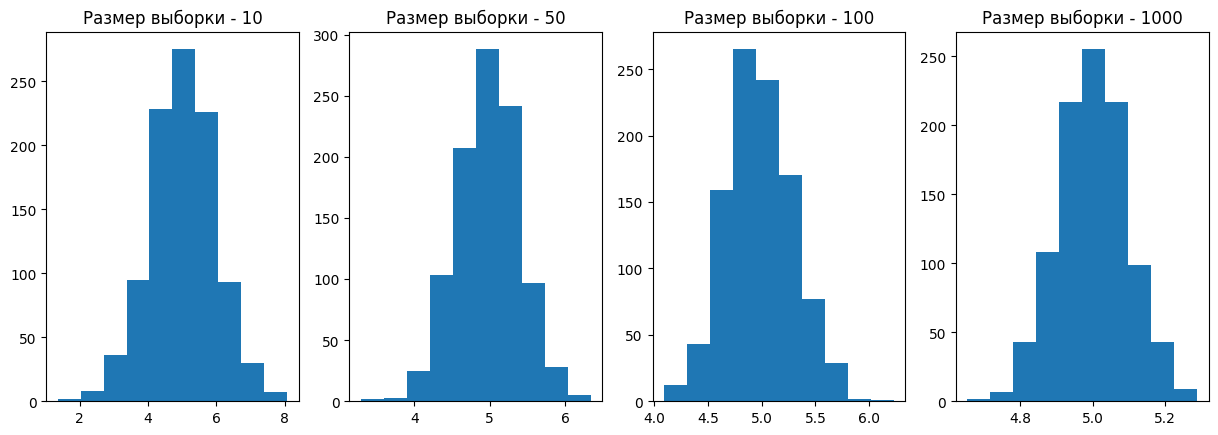

In [12]:
fig, ax = plt.subplots(1, len(sizes))
fig.set_figwidth(15)
for i, size in enumerate(sizes):
    ax[i].hist(means[i])
    ax[i].set_title(f"Размер выборки - {size}")

In [13]:
for size in sizes:
    distribution = normal['distribution'].rvs(mean, std, size)
    print(f"Размер выборки - {size}")
    print(f"Мат.ожидание- {np.mean(distribution)}")
    print(f"Стандартное отклонение - {np.std(distribution)}")
    print(f"Коэффициент вариации - {np.std(distribution)/np.mean(distribution)}")
    print(f"______")

Размер выборки - 10
Мат.ожидание- 3.708864587429679
Стандартное отклонение - 3.937428236573893
Коэффициент вариации - 1.0616263127855563
______
Размер выборки - 50
Мат.ожидание- 4.870995112570712
Стандартное отклонение - 2.868788487162308
Коэффициент вариации - 0.58895326742553
______
Размер выборки - 100
Мат.ожидание- 4.746279870460415
Стандартное отклонение - 2.7293662588842302
Коэффициент вариации - 0.5750537965262185
______
Размер выборки - 1000
Мат.ожидание- 5.032732855768757
Стандартное отклонение - 2.941918872821067
Коэффициент вариации - 0.5845569310218601
______


# Задание 3

In [14]:
# Для стандартного нормального распределения мат.ожидание = 0, стандартное отклонение = 1
mean = 0
std = 1
#Для каждого 𝑛 ≤ 10000 постройте эмпирическую функцию распределения 𝐹𝑛 и посчитайте значение статистики
#𝐷𝑛 = sup|𝐹𝑛∗(𝑥) − 𝐹(𝑥)|
#Не понял задание, пропускаю

# Задание 4


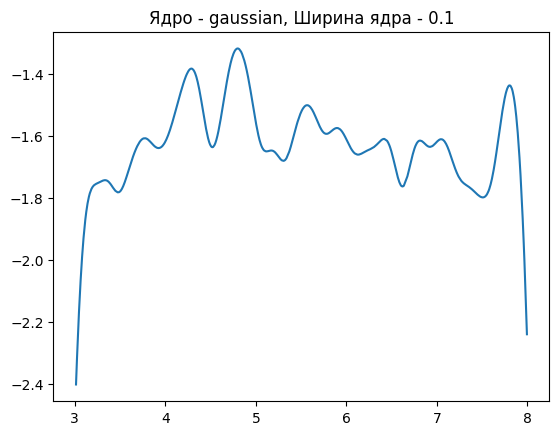

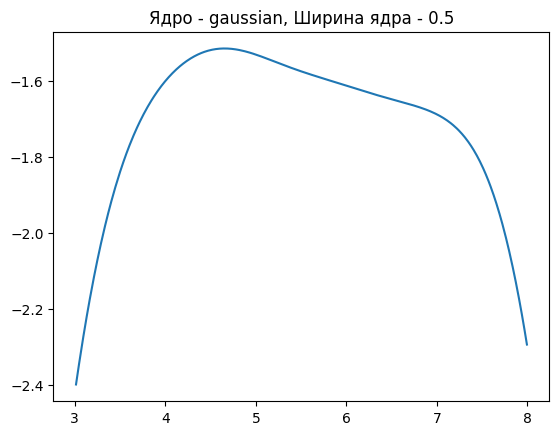

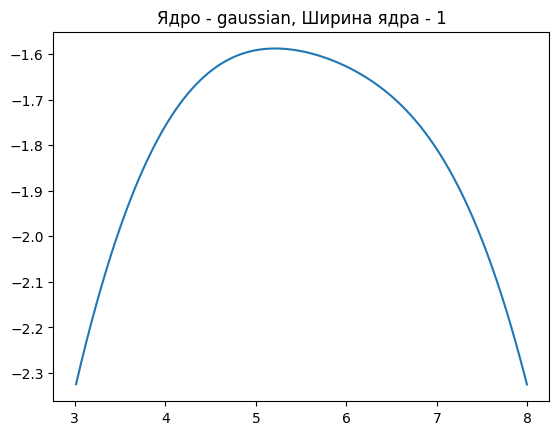

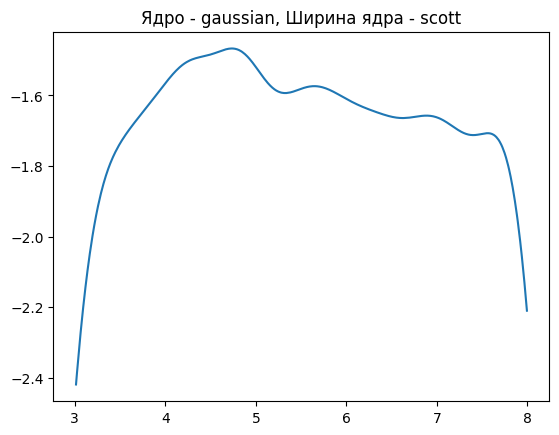

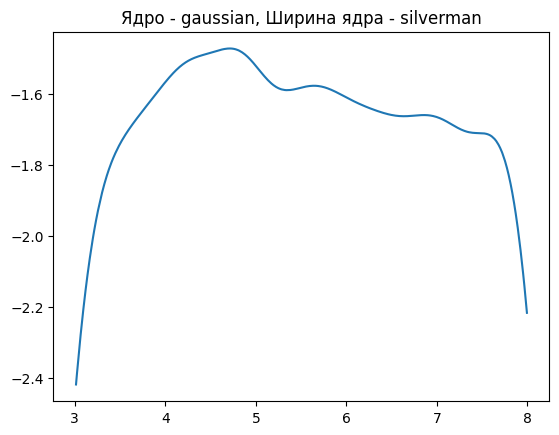

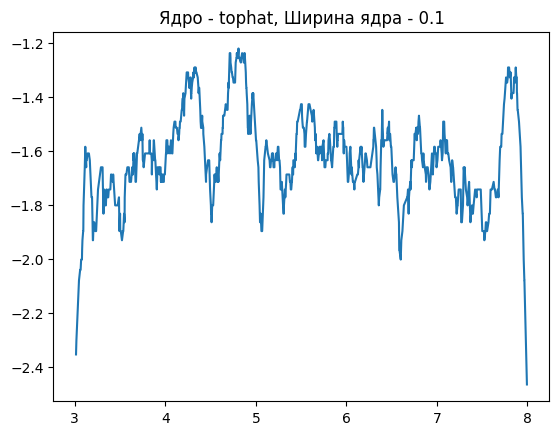

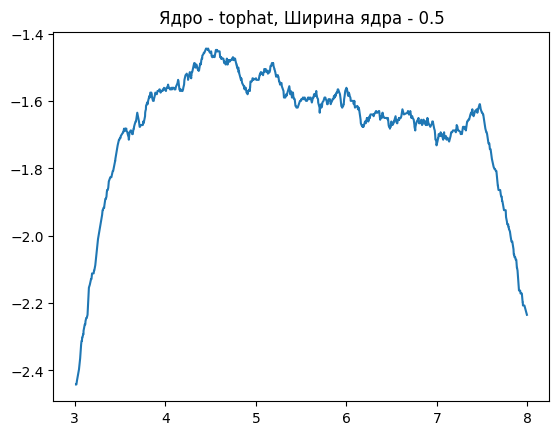

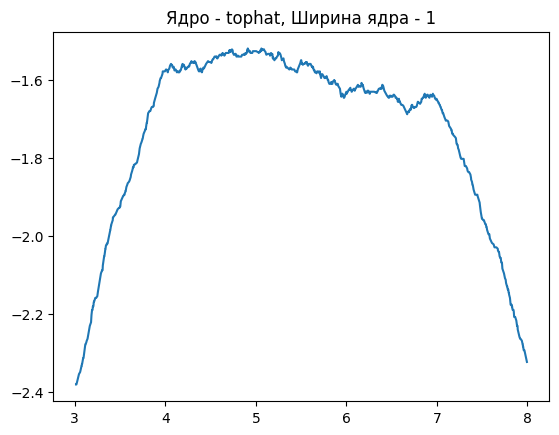

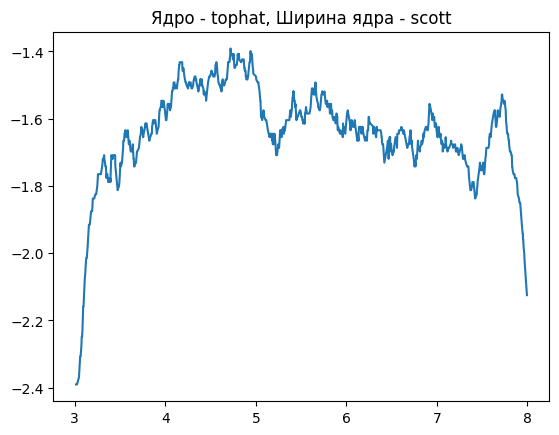

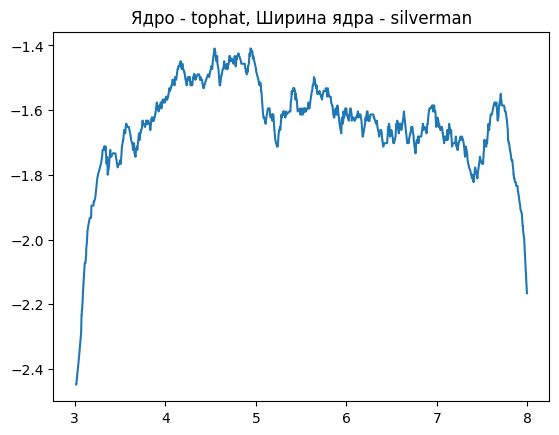

In [16]:
# score_samples логарифмирует вероятности попадания элементов в выборку, поэтому значения на оси Y < 0
for kernel in ('gaussian', 'tophat'):
    for width in (0.1, 0.5, 1, 'scott', 'silverman'):
        kde = KernelDensity(kernel=kernel, bandwidth=width).fit(uniform['array'].reshape(-1, 1))
        kde = kde.score_samples(uniform['array'].reshape(-1, 1))
        
        # Очень неудобно устанавливаю соответствие между элементами выборки и плотностью
        plt.plot(*list(zip(*sorted(list(zip(uniform['array'], kde)), key=lambda x: x[0]))))
        plt.title(f"Ядро - {kernel}, Ширина ядра - {width}")
        plt.show()
        